In [85]:
from PIL import Image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.morphology import binary_closing
from scipy import ndimage
from skimage import util 

In [86]:
import sys
sys.path.append('../scripts/')
from icon_helper_functions import *
from SVG_icon_style_transfer_module import *
from Image_to_Parts_SVG_module import *

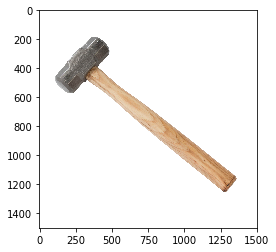

In [205]:
img_path = '../data/actual_images/Hammer/corkw'
im_color = cv2.imread(img_path,-1)[:,:,::-1]
plt.imshow(im_color)
plt.show()

In [206]:
imcv = cv2.imread(img_path,-1)[:,:,0]

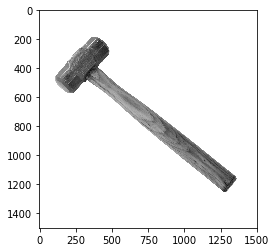

In [207]:
plt.imshow(imcv,cmap='gray')
plt.show()

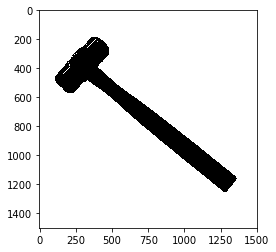

In [208]:
img = cv2.imread('../data/actual_images/Hammer/spin_prod_206237601.jpeg',0)
ret, imgf = cv2.threshold(imcv, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(imgf,cmap = 'gray')
plt.show()

In [209]:
kernel = np.ones((2,2),np.uint8)

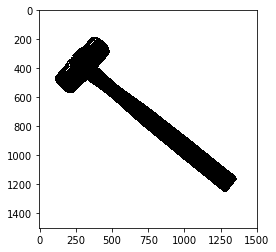

In [210]:
erosion = cv2.erode(imgf,kernel,iterations = 1)
plt.imshow(erosion,cmap='gray')
plt.show()

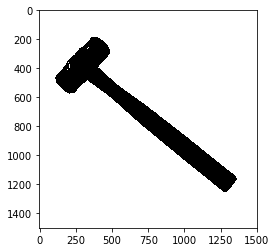

In [211]:
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap='gray')
plt.show()

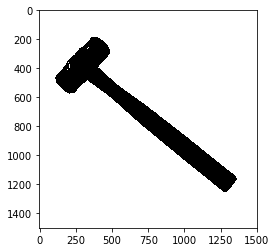

In [212]:
plt.imshow(opening,cmap='gray')
plt.show()

In [213]:
img_path

'../data/actual_images/Hammer/pr30.jpg'

In [214]:
imname = img_path.split('/')[-1]
cv2.imwrite('../outputs/actual_images/newImage.png',opening)

True

In [215]:
help(image_splitter)

Help on function image_splitter in module icon_helper_functions:

image_splitter(img_path, output_path=False, filled=False, actual=False)
    Input: argument 1 - image path or PIL Image to be split
               argument 2 - output path of folder where these images are saved. If nothing provided, images arent saved.
               argument 3 - if filled = True, image is first filled and then split. If true, pass image path.
    Output: 8 part images as PIL image objects. If output path is provided, the detected parts are saved as images



In [216]:
A = cv2.imread('../outputs/actual_images/newImage.png',-1)

In [217]:
np.max(B)

255

In [218]:
B = np.pad(A, (40, 40), 'constant',constant_values = (255,255))

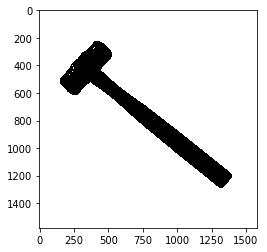

In [219]:
plt.imshow(B,cmap='gray')
plt.show()

In [220]:
B.shape

(1580, 1580)

In [221]:
imp = '../data/Icons_clean/bricklayer_hammer/bricklayer%20hammer_1016437.jpg'
imp2 = '../outputs/actual_images/newImage.png'
im = Image.open(imp2).convert('LA').resize((120,120))
data = np.array(im)
dat = data[:,:,0]
dat = np.pad(dat, (40, 40), 'constant',constant_values = (255,255))

In [222]:
dat.shape

(200, 200)

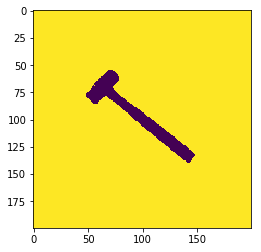

In [223]:
plt.imshow(dat)
plt.show()

In [228]:
cv2.imwrite('../outputs/actual_images/newImage.png',dat)

True

In [229]:
# a = util.invert(dat)
# plt.imshow(a)
# plt.show()

In [231]:
parts = image_splitter('../outputs/actual_images/newImage.png',actual=True)

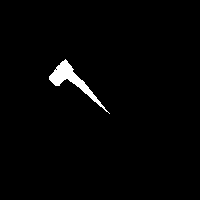

In [232]:
parts[0]

In [153]:
texture_impath = '../data/Flat_icon/hammer/222586.png'
SAVE_PATH = '../outputs/actual_hammer_images_SVGs/new_Image.svg'
SAVE_PATH_STYLED = '../outputs/actual_hammer_images_SVGs_stylized/new_Image.svg'
im_to_svg('../outputs/actual_images/newImage.png',SAVE_PATH,part1= 0,part2 = 1,actual=True)
apply_style(texture_impath,SAVE_PATH,SAVE_PATH_STYLED,'hammer')